In [3]:
import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

Platform: Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
Tensorflow version: 2.7.0
Keras version: 2.7.0


In [4]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,load_model, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.layers.noise import GaussianNoise
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
# from keras.layers.normalization import BatchNormalization
import pandas as pd
import matplotlib.pyplot as plt
import time, pickle
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [5]:
nb_classes = 10
class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'validation samples')

170508288/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 training samples
10000 validation samples


In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [7]:
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

In [8]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D

# 定義輸入
input_shape = (32, 32, 3) # RGB影像224x224 (height, width, channel)

# 輸入層
img_input = Input(shape=input_shape, name='img_input')

# 第1個卷積區塊 (block1)
x = Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv1',kernel_initializer='he_normal')(img_input)
x = Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv2',kernel_initializer='he_normal')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# 第2個卷積區塊 (block2)
x = Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv1',kernel_initializer='he_normal')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv2',kernel_initializer='he_normal')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# 第3個卷積區塊 (block3)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv1',kernel_initializer='he_normal')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv2',kernel_initializer='he_normal')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv3',kernel_initializer='he_normal')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# 第4個卷積區塊 (block4)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv1',kernel_initializer='he_normal')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv2',kernel_initializer='he_normal')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv3',kernel_initializer='he_normal')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# 第5個卷積區塊 (block5)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv1',kernel_initializer='he_normal')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv2',kernel_initializer='he_normal')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv3',kernel_initializer='he_normal')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block5_pool')(x)

# 前饋全連接區塊
x = Flatten(name='flatten')(x)
x = Dense(4096, activation='relu', name='fc1',kernel_initializer='he_normal')(x)
x = Dense(4096, activation='relu', name='fc2',kernel_initializer='he_normal')(x)
x = Dense(10, activation='softmax', name='predictions',kernel_initializer='he_normal')(x)

# 產生模型
model1 = Model(inputs=img_input, outputs=x, name='vgg16-funcapi')

# 设置参数
model1.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])
# 打印網絡結構
model1.summary()

Model: "vgg16-funcapi"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img_input (InputLayer)      [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)       

In [18]:
nb_epoch = 50
batch_size = 100
start = time.time()
h = model1.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, validation_data=(x_test, y_test), shuffle=True)
model1.save('CIFAR10_model_no_data_augmentation.h5')
print('@ Total Time Spent: %.2f seconds' % (time.time() - start))

Epoch 1/50
500/500 [==============================] - 66s 132ms/step - loss: 1.3046 - accuracy: 0.5386 - val_loss: 1.3481 - val_accuracy: 0.5151
Epoch 2/50
500/500 [==============================] - 66s 132ms/step - loss: 1.2932 - accuracy: 0.5426 - val_loss: 1.3082 - val_accuracy: 0.5314
Epoch 3/50
500/500 [==============================] - 64s 128ms/step - loss: 1.2826 - accuracy: 0.5448 - val_loss: 1.3046 - val_accuracy: 0.5334
Epoch 4/50
500/500 [==============================] - 66s 132ms/step - loss: 1.2718 - accuracy: 0.5493 - val_loss: 1.2911 - val_accuracy: 0.5348
Epoch 5/50
500/500 [==============================] - 64s 128ms/step - loss: 1.2632 - accuracy: 0.5517 - val_loss: 1.2913 - val_accuracy: 0.5380
Epoch 6/50
500/500 [==============================] - 66s 132ms/step - loss: 1.2510 - accuracy: 0.5553 - val_loss: 1.2659 - val_accuracy: 0.5484
Epoch 7/50
500/500 [==============================] - 64s 128ms/step - loss: 1.2438 - accuracy: 0.5601 - val_loss: 1.2824 - val_ac

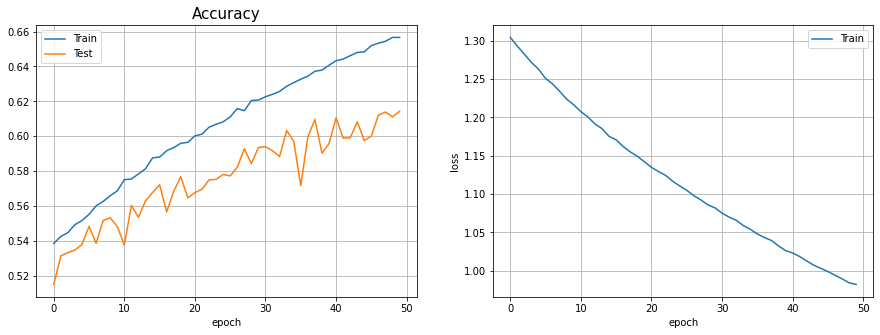

In [19]:
def plot_acc_loss(h, nb_epoch):
    acc, loss, val_acc, val_loss = h.history['accuracy'], h.history['loss'], h.history['val_accuracy'], h.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(nb_epoch), acc, label='Train')
    plt.plot(range(nb_epoch), val_acc, label='Test')
    plt.title('Accuracy', size=15)
    # plt.ylabel('%')
    plt.xlabel('epoch')
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(nb_epoch), loss, label='Train')
    # plt.plot(range(nb_epoch), val_loss, label='Test')
    plt.title('', size=15)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_acc_loss(h, nb_epoch)